**KNN ALGORITHM IMPLEMENTATION**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

In [3]:
uploaded = files.upload()
traindata = pd.read_csv(io.BytesIO(uploaded['train_knn.txt']), header = None, sep = ",")
train=traindata.to_numpy();
print(train)

Saving train_knn.txt to train_knn.txt
[[7 7 1]
 [7 4 1]
 [6 4 1]
 [7 5 1]
 [7 6 1]
 [6 7 1]
 [6 6 1]
 [3 4 2]
 [2 3 2]
 [3 2 2]
 [4 3 2]
 [3 3 2]
 [4 4 2]
 [1 4 2]]


In [5]:
uploaded = files.upload()
testdata = pd.read_csv(io.BytesIO(uploaded['test_knn.txt']), header = None, sep = ",")
test=testdata.to_numpy();
print(test)

Saving test_knn.txt to test_knn.txt
[[3 7]
 [7 7]
 [4 3]
 [2 8]
 [3 5]
 [1 2]
 [4 8]
 [8 3]
 [8 4]]


In [ ]:
class1=[[x[0],x[1]] for x in train if x[2]==1]
class2=[[x[0],x[1]] for x in train if x[2]==2]
class1 = np.array(class1)
class2 = np.array(class2)

print(class1)

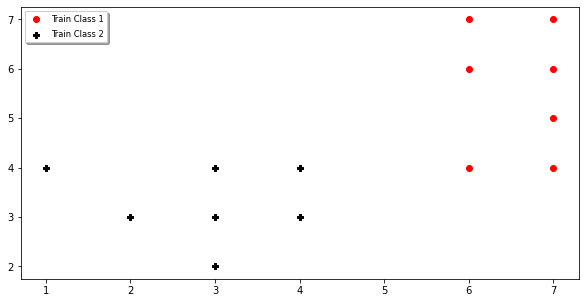

In [7]:
f, ax = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)

ax.scatter(class1[:,0],class1[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(class2[:,0],class2[:,1],marker='P',color='k',label='Train Class 2')
legend = ax.legend(loc='best', shadow=True, fontsize='small',labelspacing=.8)
plt.show()

In [9]:
def eucludian_distance(x,y):
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

In [35]:
'''KNN ALGORITHM'''
import os
PATH = '/tmp/'
file = 'prediction.txt'
with open(os.path.join(PATH, file), 'w') as fp: 
    pass
PATH = '/tmp/prediction.txt'
def KNN(k,point):
    out = os.open(PATH, os.O_APPEND | os.O_RDWR) 
    best=[]
    os.write(out, str.encode("Test Point: {},{}\n".format(point[0],point[1])))
    cnt_class1=0
    cnt_class2=0
    for item in train:
        dis=eucludian_distance(point,item)
        #print(item,'distance',dis)
        best.append((dis,item[2]))
        #print(best)
    best.sort(key=lambda x:x[0])
    for i in range(k):
        os.write(out, str.encode("Distance {}: {:.2f} \t Class:{}\n".format(i+1,best[i][0],best[i][1])))
    for i in range(k):        
        if(best[i][1]==1):
            cnt_class1+=1
        else:
            cnt_class2+=1
 #   out.write("cnt = {} - {}\n".format(cnt_class1, cnt_class2))
      
    if(cnt_class1>=cnt_class2):
        os.write(out, str.encode("Predicted Class {}\n".format(1)))    
    else:
        os.write(out, str.encode("Predicted Class {}\n".format(2)))
    os.write(out, str.encode("\n"))
    os.close(out)


In [36]:
K=int(input('Enter K value:'))  
for point in test:
    KNN(K,point)

Enter K value:3
